# Introdução aos métodos discretos

Nome: Yago Pereira dos Anjos Santos

# Lista 1
Seja o seguinte problema de valor de contorno:
\begin{equation}
u''(x) - 4u(x) = 4x,\hspace{1cm} 0 \leqslant x \leqslant 1 \\
\end{equation}
sujeito às seguintes condições de contorno
\begin{equation*}
u(0) = u(1) = 0,
\end{equation*}
cuja solução exata é
\begin{equation*}
u(x) = \frac{e^{2x} - e^{-2x}}{e^2 - e^{-2}} - x.
\end{equation*}

### 1) Resolva o problema usando o método dos momentos com $N=3$.

(a) Apresente as funções bases da solução aproximada e as funções de ponderação.

Para o método dos momentos para $N = 3$ temos as seguintes funções bases, satisfazendo as condições de contorno do problema, da solução aproximada: $$\phi_{1}(x) = x\,(1-x), \phi_{2}(x) = x^{2}\,(1-x) \text{ e } \phi_{3} = x^{3}\,(x-1).$$
Assim, a solução aproximada tem a forma $\tilde{u} = \alpha_{1}\,x(1-x) + \alpha_{2}\,x^{2}\,(1-x) + \alpha_{3}\,x^{3}\,(1-x)$, onde $\alpha_{j}$ com $j = 1, 2, 3$ são as incógnitas. As funções de ponderação são dadas por $\omega_{i}(x) = x^{i-1}$. Assim, temos: $$ \omega_{1}(x) = x^{1 - 1} = 1, \omega_{2}(x) = x^{2 - 1} = x \text{ e } \omega_{3}(x) = x^{3 - 1} = x^{2}.$$

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt


''' Uma função para plotar a solução exata do problema '''
def u(x):
    return (np.exp(2*x) - np.exp(-2*x))/(np.exp(2) - np.exp(-2)) - x


''' Definindo as funções base '''
def bases(x):
    return [x*(1-x), x**2*(1-x), x**3*(1-x)]


''' Função f em Lu = f '''
def f(x):
    return 4*x


''' Definindo o operador diferencial '''
def L(phi):
    x = sp.symbols('x')
    ans = sp.diff(sp.diff(phi, x), x) - 4*phi
    return ans

# Variável independente x
x = sp.symbols('x')

''' Definindo as funções base '''
phi1 = bases(x)[0]
phi2 = bases(x)[1]
phi3 = bases(x)[2]
phi = np.array([phi1, phi2, phi3])

''' Definindo as funções de ponderação '''
omg = np.array([1, x, x**2])

print('Funções base:')
print(f'phi1 = {phi1}, phi2 = {phi2}, phi3 = {phi3}')
print('\nFunções de ponderação:')
print(f'omega1 = {omg[0]}, omega2 = {omg[1]}, omega3 = {omg[2]}')

Funções base:
phi1 = x*(1 - x), phi2 = x**2*(1 - x), phi3 = x**3*(1 - x)

Funções de ponderação:
omega1 = 1, omega2 = x, omega3 = x**2


(b) Apresente a matriz $\mathbf{A}$ e o vetor $\mathbf{b}$ do sistema linear resultante.

Para o problema em questão, a equação diferencial pode ser escrita na forma $\mathcal{L}(u) - f = 0$, onde $\mathcal{L}(\cdot) = \dfrac{d^{2}}{dx^{2}}(\cdot) - 4\,(\cdot)$ e $f(x) = 4\,x$. A fim de determinar a matriz $A$ e o vetor $b$ para a solução do sistema, utilizaremos as seguintes expressões:
$$ A_{ij} = \int\limits_{0}^{1}\omega_{i}(x)\,\mathcal{L[\phi_{j}(x)]}\,dx \ \text{ e } \ b_{i} = \int\limits_{0}^{1} \omega_{i}(x)\,f(x)\,dx. $$
Desta forma calculamos os $A_{ij}$'s e $b_{i}$'s como segue:
\begin{align*}
    &A_{11} = \int\limits_{0}^{1} (-2-4\,x+4\,x^{2})\,dx = -\frac{8}{3}, \ \ \ \ A_{12} = \int\limits_{0}^{1} (2-6\,x-4\,x^{2}+4\,x^{3})\,dx = -\frac{4}{3} \\
    &A_{21} = \int\limits_{0}^{1} x\,(-2-4\,x+4\,x^{2})\,dx = -\frac{4}{3}, \ \ \ \ A_{22} = \int\limits_{0}^{1} x\,(2-6\,x-4\,x^{2}+4\,x^{3})\,dx = -\frac{6}{5} \\
    & A_{31} = \int\limits_{0}^{1} x^{2}\,(-2-4\,x+4\,x^{2})\,dx = -\frac{13}{15}, \ \ \ \ A_{32} = \int\limits_{0}^{1} x^{2}\,(2-6\,x-4\,x^{2}+4\,x^{3})\,dx = -\frac{29}{30} \\
    &A_{13} = \int\limits_{0}^{1} (6\,x - 12x^{2} -4\,x^{3} + 4x^{4})\,dx = -\frac{6}{5}, \ \ \ \ A_{23} = \int\limits_{0}^{1} x\,(6\,x - 12x^{2} -4\,x^{3} + 4x^{4})\,dx = -\frac{17}{15} \\
    &A_{33} = \int\limits_{0}^{1} x^{2}\,(6\,x - 12x^{2} -4\,x^{3} + 4x^{4})\,dx = -\frac{209}{210}, \ \ \ \ b_{1} = \int\limits_{0}^{1} 4\,x\,dx = 2 \\
    &b_{2} = \int\limits_{0}^{1} x\,4\,x\,dx = \frac{4}{3}, \ \ \ \ b_{3} = \int\limits_{0}^{1} x^{2}\,4x\,dx = 1.
\end{align*}
Logo, a matriz $A$ e o vetor $b$ do sistema linear resultante são dados por:
\begin{align*}
    A = \begin{pmatrix}
        -\frac{8}{3} & -\frac{4}{3} & -\frac{6}{5} \\ -\frac{4}{3} & -\frac{6}{5} & -\frac{17}{15} \\ -\frac{13}{15} & -\frac{29}{30} & -\frac{209}{210}
    \end{pmatrix}, \ \ \ b = \begin{pmatrix} 2 \\ \frac{4}{3} \\ 1 \end{pmatrix}.
\end{align*}

In [2]:
# Matrizes para cálculo numérico
A = np.zeros((3, 3))
b = np.zeros(3)

# Matrizes simbólicas para exibição
A_symb = sp.zeros(3, 3)
b_symb = sp.zeros(3, 1)

''' Preenchendo a matriz simbólica para exibição e a matriz numérica (numpy) para resolver sistema linear posteriormente '''
for i in range(3):
    b_symb[i] = sp.integrate(omg[i]*f(x), (x, 0, 1))
    b[i] = b_symb[i]
    for j in range(3):
        A_symb[i, j] = sp.integrate(omg[i]*L(phi[j]), (x, 0, 1))
        A[i, j] = A_symb[i, j]

# Imprimindo a Matriz A e o vetor b (simbólicos)
print('Matriz A:')
aux = np.array([list(A_symb[i, :]) for i in range(3)])
print(aux)
print(f'\nVetor b: {list(b_symb)}.')

Matriz A:
[[-8/3 -4/3 -6/5]
 [-4/3 -6/5 -17/15]
 [-13/15 -29/30 -209/210]]

Vetor b: [2, 4/3, 1].


(c) Plote o gráfico da solução aproximada em comparação ao gráfico da solução exata.

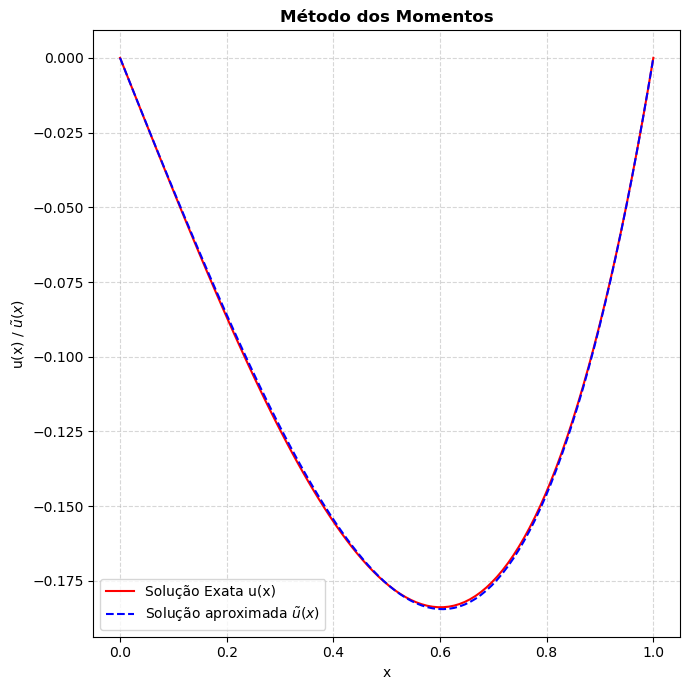

In [3]:
# Determinando os parâmetros alpha coeficientes da solução aproximada procurada
# Resolvendo o sistema linear Ax = b, onde x são os coeficientes alpha
alpha = np.linalg.solve(A, b)

# Solução aproximada u_p como combinação linear das funções base
u_p = alpha[0]*phi[0] + alpha[1]*phi[1] + alpha[2]*phi[2]
# Convertendo a solução aproximada u_p para efetuar cálculos numéricos
solucao_p = sp.lambdify(x, u_p, 'numpy')
''' Gerando uma lista de valores de 0 até 1 '''
x_vals = np.linspace(0, 1, 100)
# Avaliando solução aproximada nos pontos x_vals
u_approx = solucao_p(x_vals)
# Avaliando solução exata nos pontos x_vals
sol_exata = u(x_vals)

''' Plotando as soluções Exata e Aproximada '''
plt.figure(figsize=(7, 7))
plt.plot(x_vals, sol_exata, c='red', label='Solução Exata u(x)')
plt.plot(x_vals, u_approx, c='blue', ls='--', label='Solução aproximada $\\tilde{u}(x)$')
plt.grid(alpha=0.5, ls='--')
plt.title('Método dos Momentos', fontweight='bold')
plt.xlabel('x')
plt.ylabel('u(x) / $\\tilde{u}(x)$')
plt.legend()
plt.tight_layout()
plt.show()

(d) Plote o gráfico do resíduo.

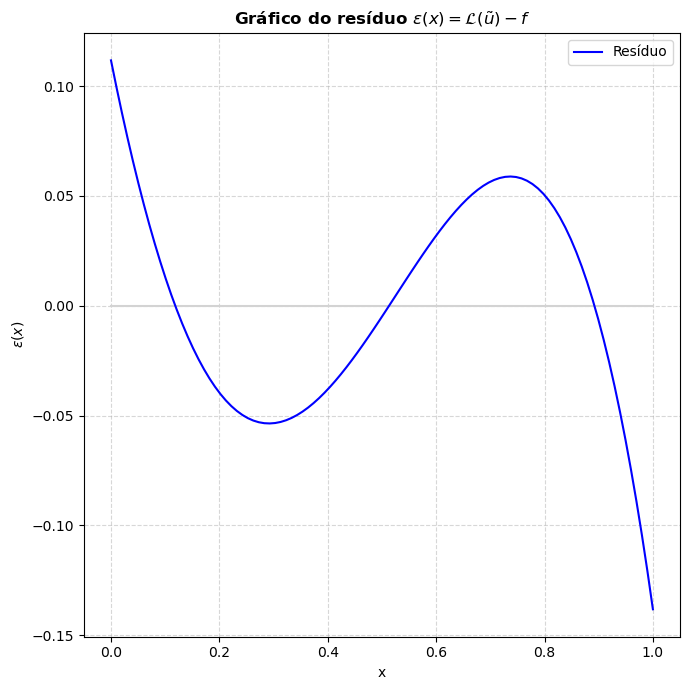

In [4]:
# Resíduo (Conversão para efetuar cálculos numéricos)
residuo = sp.lambdify(x, L(u_p) - f(x), 'numpy')
epsilon = residuo(x_vals)

# Plotando o resíduo
plt.figure(figsize=(7, 7))
plt.plot(x_vals, 0*x_vals, c='lightgray')
plt.plot(x_vals, epsilon, c='blue', label='Resíduo')
plt.grid(alpha=0.5, ls='--')
plt.xlabel('x')
plt.ylabel('$\\epsilon(x)$')
plt.title('Gráfico do resíduo $\\epsilon(x) = \\mathcal{L}(\\tilde{u}) - f$', fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

### 2) Resolva o problema usando o método da Colocação com $N=3$ e os seguintes pontos $\xi_1 = 0.25$, $\xi_2 = 0.5$ e $\xi_3 = 0.75$.

(a) Apresente as funções bases da solução aproximada e as funções de ponderação.

Para o método da Colocação, utilizaremos as mesmas funções base do exercício anterior, isto é, $\phi_{1}(x) = x\,(1-x), \phi_{2}(x) = x^{2}\,(1-x)$ e $\phi_{3}(x) = x^{3}\,(1-x)$. Além disso, as funções de ponderação para o método da Colocação são dadas pela função delta de Dirac, ou seja, $\omega_{i}(x) = \delta(x - \xi_{i})$. Desta forma, as funções de ponderação são: $$\omega_{1}(x) = \delta(x - 0.25), \omega_{2}(x) = \delta(x - 0.5) \text{ e } \delta(x - 0.75).$$

In [5]:
XI = np.array([0.25, 0.5, 0.75])
omega = np.array([x - xi for xi in XI])

print('Funções base:')
print(f'phi1 = {phi1}, phi2 = {phi2}, phi3 = {phi3}.')
print('Funções de ponderação:')
print(f'omega1 = delta({omega[0]}), omega2 = delta({omega[1]}), omega3 = delta({omega[2]}).')

Funções base:
phi1 = x*(1 - x), phi2 = x**2*(1 - x), phi3 = x**3*(1 - x).
Funções de ponderação:
omega1 = delta(x - 0.25), omega2 = delta(x - 0.5), omega3 = delta(x - 0.75).


(b) Apresente a matriz $\mathbf{A}$ e o vetor $\mathbf{b}$ do sistema linear resultante.

Neste caso, os coeficientes da matriz $A$ e as coordenadas do vetor $b$ do sistema linear resultante são dados pelas seguintes expressões, respectivamente:
\begin{align*}
    A_{ij} = \int\limits_{0}^{1} \delta(x - \xi_{i})\,\mathcal{L}(\phi_{j}(x))\,dx = \mathcal{L}(\phi_{j}(\xi_{i})) \ \ \text{ e } \ \ b_{i} = \int\limits_{0}^{1} \delta(x - \xi_{i})\,f(x)\,dx = f(\xi_{i}).
\end{align*}
Diante disso,
\begin{align*}
    &A_{11} = [-2 - 4\,x + 4\,x^{2}]_{x = 0.25} = -\frac{11}{4}, \ \ A_{12} = [2 - 6\,x - 4\,x^{2} + 4\,x^{3}]_{0.25} = \frac{5}{16}, \ \ A_{13} = [6\,x - 12\,x^{2} - 4\,x^{3} + 4\,x^{4}]_{0.25} = \frac{45}{64} \\
    &A_{21} = [-2 - 4\,x + 4\,x^{2}]_{0.5} = -3, \ \ A_{22} = [2 - 6\,x - 4\,x^{2} + 4\,x^{3}]_{0.5} = -\frac{3}{2}, \ \ A_{23} = [6\,x - 12\,x^{2} - 4\,x^{3} + 4\,x^{4}]_{0.5} = -\frac{1}{4} \\
    &A_{31} = [-2 - 4\,x + 4\,x^{2}]_{0.75} = -\frac{11}{4}, \ \ A_{32} = [2 - 6\,x - 4\,x^{2} + 4\,x^{3}]_{0.75} = -\frac{49}{16}, \ \ A_{33} = [6\,x - 12\,x^{2} - 4\,x^{3} + 4\,x^{4}]_{0.75} = -\frac{171}{64} \\
    &b_{1} = [4\,x]_{0.25} = 1, \ \ b_{2} = [4\,x]_{0.5} = 2, \ \ b_{3} = [4\,x]_{0.75} = 3.
\end{align*}

Logo, a matriz $A$ e o vetor $b$ são dados por:
\begin{align*}
    A = \begin{pmatrix}
        -\frac{11}{4} & \frac{5}{16} & \frac{45}{64} \\
        -3 & -\frac{3}{2} & -\frac{1}{4} \\
        -\frac{11}{4} & -\frac{49}{16} & -\frac{171}{64}
    \end{pmatrix}, \ \ b = \begin{pmatrix} 1 \\ 2 \\ 3 \end{pmatrix}.
\end{align*}

In [6]:
# Matrizes para cálculo numérico
A = np.zeros((3, 3))
b = np.zeros(3)

# Matriz simbólica para exibição
A_symb = sp.zeros(3, 3)

b = np.array([f(xi) for xi in XI])

for i in range(3):
    for j in range(3):
        A_symb[i, j] = L(phi[j]).subs('x', XI[i])
        A[i, j] = A_symb[i, j]

print('Matriz A:')
aux = np.array([list(A_symb[i, :]) for i in range(3)])
print(aux)
print(f'Vetor b: {b}')

Matriz A:
[[-2.75000000000000 0.312500000000000 0.703125000000000]
 [-3.00000000000000 -1.50000000000000 -0.250000000000000]
 [-2.75000000000000 -3.06250000000000 -2.67187500000000]]
Vetor b: [1. 2. 3.]


(c) Plote o gráfico da solução aproximada em comparação ao gráfico da solução exata.

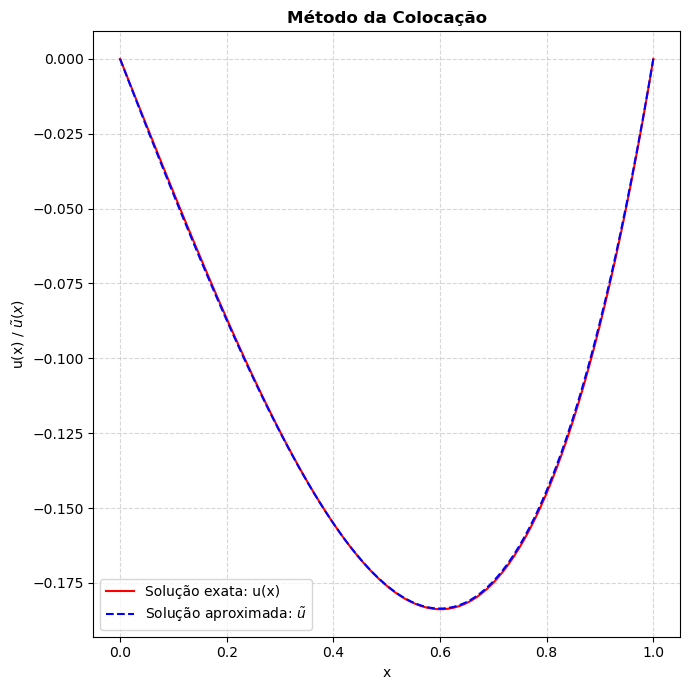

In [7]:
# Determinando os parâmetros alpha coeficientes da solução aproximada procurada
# Resolvendo o sistema linear Ax = b, onde x são os coeficientes alpha
alpha = np.linalg.solve(A, b)

# Forma da solução aproximada
u_p = alpha[0]*phi[0] + alpha[1]*phi[1] + alpha[2]*phi[2]
# Convertendo para cálculos numéricos
solucao_p = sp.lambdify(x, u_p, 'numpy')
# Avaliando a solução aproximada nos pontos x_vals
u_approx = solucao_p(x_vals)

''' Plotando as soluções Exata e Aproximada '''
plt.figure(figsize=(7, 7))
plt.plot(x_vals, sol_exata, c='red', label='Solução exata: u(x)')
plt.plot(x_vals, u_approx, c='blue', ls='--', label='Solução aproximada: $\\tilde{u}$')
plt.grid(alpha=0.5, ls='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x) / $\\tilde{u}(x)$')
plt.title('Método da Colocação', fontweight='bold')
plt.tight_layout()
plt.show()

(d) Plote o gráfico do resíduo.

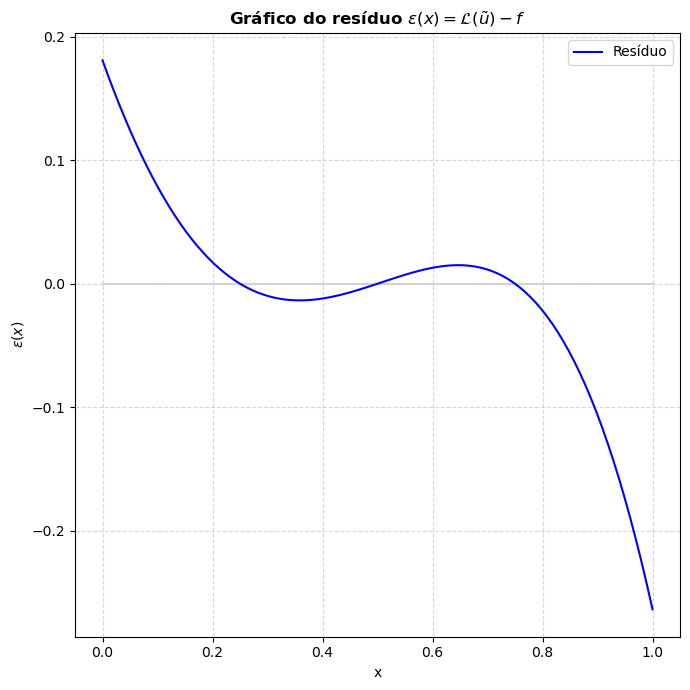

In [8]:
# Resíduo (Conversão para efetuar cálculos numéricos)
residuo = sp.lambdify(x, L(u_p) - f(x), 'numpy')
epsilon = residuo(x_vals)

# Plotando o resíduo
plt.figure(figsize=(7, 7))
plt.plot(x_vals, 0*x_vals, c='lightgray')
plt.plot(x_vals, epsilon, c='blue', label='Resíduo')
plt.grid(alpha=0.5, ls='--')
plt.xlabel('x')
plt.ylabel('$\\epsilon(x)$')
plt.title('Gráfico do resíduo $\\epsilon(x) = \\mathcal{L}(\\tilde{u}) - f$', fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

### 3) Resolva o problema usando o método de Galerkin com $N=3$.

(a) Apresente as funções bases da solução aproximada e as funções de ponderação.

Para a solução do problema pelo método de Galerkin, usaremos as mesmas funções bases $\phi_{1}$, $\phi_{2}$ e $\phi_{3}$ dos items anteriores. Para este caso, as funções de ponderação são dadas pelas próprias funções bases, isto é, $\omega_{i}(x) = \phi_{i}(x)$. Logo,
\begin{align*}
    &\phi_{1}(x) = x\,(1-x), \phi_{2}(x) = x^{2}\,(1-x) \ \text{ e } \ \phi_{3}(x) = x^{3}\,(1-x), \\
    &\omega_{1}(x) = \phi_{1}(x), \omega_{2}(x) = \phi_{2}(x) \ \text{ e } \ \omega_{3}(x) = \phi_{3}(x).
\end{align*}

In [9]:
omega = np.array([phi1, phi2, phi3])

print('Funções base:')
print(f'phi1 = {phi1}, phi2 = {phi2}, phi3 = {phi3}.')
print('Funções de ponderação:')
print(f'omega1 = {omega[0]}, omega2 = {omega[1]}, omega3 = {omega[2]}.')

Funções base:
phi1 = x*(1 - x), phi2 = x**2*(1 - x), phi3 = x**3*(1 - x).
Funções de ponderação:
omega1 = x*(1 - x), omega2 = x**2*(1 - x), omega3 = x**3*(1 - x).


(b) Apresente a matriz $\mathbf{A}$ e o vetor $\mathbf{b}$ do sistema linear resultante.

Para determinar os coeficientes da matriz $A$ e as coordenadas do vetor $b$ do sistema linear resultante, utilizaremos as seguintes expressões:
\begin{align*}
    A_{ij} = \int\limits_{0}^{1} \phi_{i}(x)\,\mathcal{L}(\phi_{j}(x))\,dx \ \text{ e } \ b_{i} = \int\limits_{0}^{1} \phi_{i}(x)\,f(x)\,dx.
\end{align*}
Desta forma, podemos calcular os coeficientes da matriz $A$ e as coordenadas do vetor $b$ como segue:
\begin{align*}
    &A_{11} = \int\limits_{0}^{1} x\,(1-x)\,(-2 - 4\,x + 4\,x^{2})\,dx = -\frac{7}{15}, \ \ A_{12} = \int\limits_{0}^{1} x\,(1-x)\,(2 - 6\,x - 4\,x^{2} + 4\,x^{3})\,dx = -\frac{7}{30} \\
    &A_{13} = \int\limits_{0}^{1} x\,(1-x)\,(6\,x - 12\,x^{2} - 4\,x^{3} + 4\,x^{4})\,dx = -\frac{29}{210}, \ \ A_{21} = \int\limits_{0}^{1} x^{2}\,(1-x)\,(-2 - 4\,x + 4\,x^{2})\,dx = -\frac{7}{30} \\
    &A_{22} = \int\limits_{0}^{1} x^{2}\,(1-x)\,(2 - 6\,x - 4\,x^{2} + 4\,x^{3})\,dx = -\frac{6}{35}, \ \ A_{23} = \int\limits_{0}^{1} x^{2}\,(1-x)\,(6\,x - 12\,x^{2} - 4\,x^{3} + 4\,x^{4})\,dx = -\frac{13}{105} \\
    &A_{31} = \int\limits_{0}^{1} x^{3}\,(1-x)\,(-2 - 4\,x + 4\,x^{2})\,dx = -\frac{29}{210}, \ \ A_{32} = \int\limits_{0}^{1} x^{3}\,(1-x)\,(2 - 6\,x - 4\,x^{2} + 4\,x^{3})\,dx = -\frac{13}{105} \\
    &A_{33} = \int\limits_{0}^{1} x^{3}\,(1-x)\,(6\,x - 12\,x^{2} - 4\,x^{3} + 4\,x^{4})\,dx = -\frac{32}{315}, \ \ b_{1} = \int\limits_{0}^{1} x\,(1-x)\,(4\,x)\,dx = \frac{1}{3} \\
    &b_{2} = \int\limits_{0}^{1} x^{2}\,(1-x)\,(4\,x)\,dx = \frac{1}{5}, \ \ b_{3} = \int\limits_{0}^{1} x^{3}\,(1-x)\,(4\,x)\,dx = \frac{2}{15}.
\end{align*}
Logo, a matriz $A$ e o vetor $b$ são dados por:
\begin{align*}
    A = \begin{pmatrix}
        -\frac{7}{15} & -\frac{7}{30} & -\frac{29}{210} \\
        -\frac{7}{30} & -\frac{6}{35} & -\frac{13}{105} \\
        -\frac{29}{210} & -\frac{13}{105} & -\frac{32}{315}
    \end{pmatrix}, \ \ b = \begin{pmatrix} \frac{1}{3} \\ \frac{1}{5} \\ \frac{2}{15} \end{pmatrix}.
\end{align*}

In [10]:
A_symb = sp.zeros(3, 3)
b_symb = sp.zeros(3, 1)

A = np.zeros((3, 3))
b = np.zeros(3)

for i in range(3):
    b_symb[i] = sp.integrate(omega[i]*f(x), (x, 0, 1))
    b[i] = b_symb[i]
    for j in range(3):
        A_symb[i, j] = sp.integrate(omega[i]*L(phi[j]), (x, 0, 1))
        A[i, j] = A_symb[i, j]

aux = np.array([list(A_symb[i, :]) for i in range(3)])
print('Matriz A = ')
print(aux)
print(f'Vetor b = {list(b_symb)}')

Matriz A = 
[[-7/15 -7/30 -29/210]
 [-7/30 -6/35 -13/105]
 [-29/210 -13/105 -32/315]]
Vetor b = [1/3, 1/5, 2/15]


(c) Plote o gráfico da solução aproximada em comparação ao gráfico da solução exata.

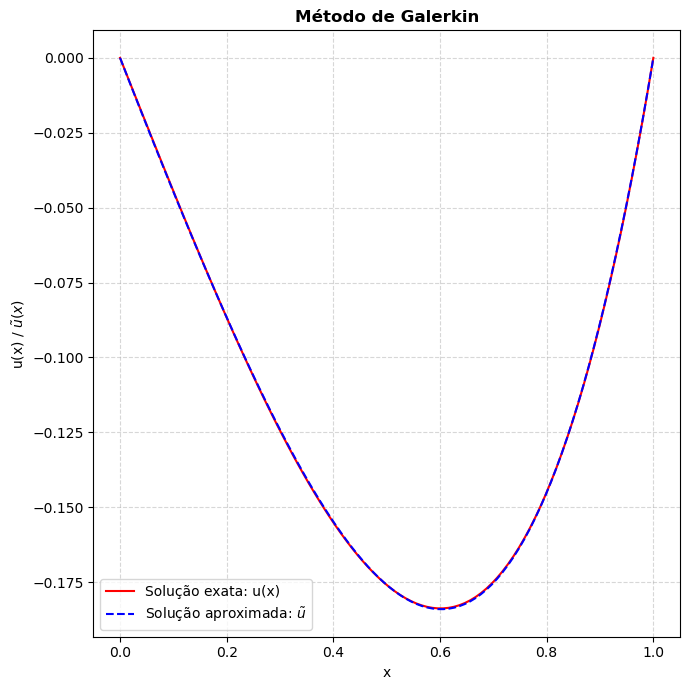

In [11]:
# Determinando os parâmetros alpha coeficientes da solução aproximada procurada
# Resolvendo o sistema linear Ax = b, onde x são os coeficientes alpha
alpha = np.linalg.solve(A, b)

# Forma da solução aproximada
u_p = alpha[0]*phi[0] + alpha[1]*phi[1] + alpha[2]*phi[2]
# Convertendo para cálculos numéricos
solucao_p = sp.lambdify(x, u_p, 'numpy')
# Avaliando a solução aproximada nos pontos x_vals
u_approx = solucao_p(x_vals)

''' Plotando as soluções Exata e Aproximada '''
plt.figure(figsize=(7, 7))
plt.plot(x_vals, sol_exata, c='red', label='Solução exata: u(x)')
plt.plot(x_vals, u_approx, c='blue', ls='--', label='Solução aproximada: $\\tilde{u}$')
plt.grid(alpha=0.5, ls='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x) / $\\tilde{u}(x)$')
plt.title('Método de Galerkin', fontweight='bold')
plt.tight_layout()
plt.show()

(d) Plote o gráfico do resíduo.

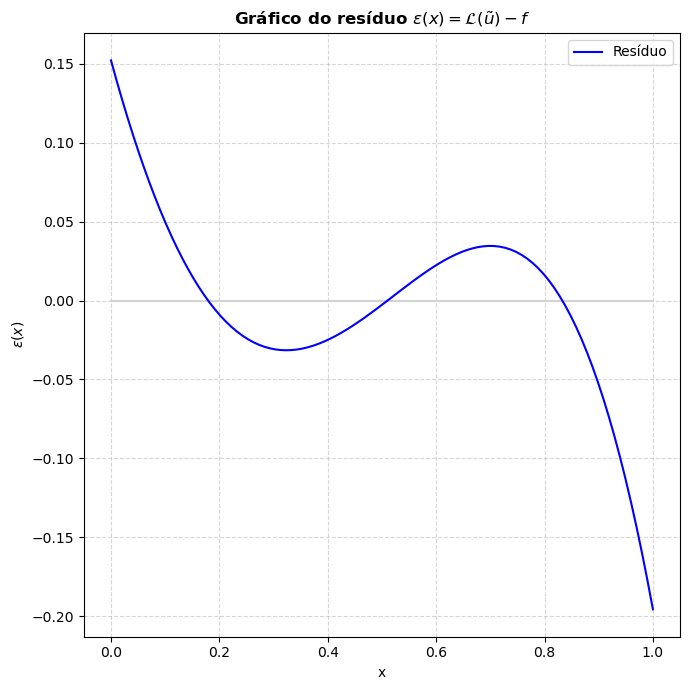

In [12]:
# Resíduo (Conversão para efetuar cálculos numéricos)
residuo = sp.lambdify(x, L(u_p) - f(x), 'numpy')
epsilon = residuo(x_vals)

# Plotando o resíduo
plt.figure(figsize=(7, 7))
plt.plot(x_vals, 0*x_vals, c='lightgray')
plt.plot(x_vals, epsilon, c='blue', label='Resíduo')
plt.grid(alpha=0.5, ls='--')
plt.xlabel('x')
plt.ylabel('$\\epsilon(x)$')
plt.title('Gráfico do resíduo $\\epsilon(x) = \\mathcal{L}(\\tilde{u}) - f$', fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()